# Phase 2

## Problem Definition

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

## Dataset

#### Give Me Some Credit

In this Model, credit scoring data sets from Kaggle 
called ‘Give me some credit’ is used to build classifiers. To evaluate
the classification performance of credit scoring model.

 We will use the training dataset (cs-training.csv file) which will be used for models training and test data (cs-test.csv file) .

## Prepare Data

In this part, the data and variables is done. Target ratio, variables
values distributions are also be investigated. Null value analysis is done and null values in
variables, filled with statistical approach to prevent them to influence modelling in a bad
way.


After the describing inputs, missing values are also investigated, and for 2 inputs
(‘MonthlyIncome’ , ‘NumberOfDependents’) some missing values are observed. Handling
with missing values is very important to create accurate models, 


#### The variables in the following data set:
| Variable Name              | Description                                                                                                                                              | Type       |
| :- |-------------: | :-:
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                 | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in years                                                                                                                                 | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | integer    |
| DebtRatio                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                               | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                           | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due.                                                                                              | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | integer    |



## Python packages

### NumPy
NumPy is a well known general-purpose array-processing package. An extensive collection of high complexity mathematical functions make NumPy powerful to process large multi-dimensional arrays and matrices. NumPy is very useful for handling linear algebra, Fourier transforms, and random numbers.
### Scikit-learn
The Python library, Scikit-Learn, is built on top of the matplotlib, NumPy, and SciPy libraries. This Python ML library has several tools for data analysis and data mining tasks.

### Pandas
Pandas is a popular Python library for data analysis. It is not directly related to Machine Learning. As we know that the dataset must be prepared before training. In this case, Pandas comes handy as it was developed specifically for data extraction and preparation.
### Matplotlib
Matplotlib is a very popular Python library for data visualization. Like Pandas, it is not directly related to Machine Learning. It particularly comes in handy when a programmer wants to visualize the patterns in the data. It is a 2D plotting library used for creating 2D graphs and plots.
### seaborn

Seaborn is a library for making statistical graphs in Python. It is built on top of matplotlib and also integrated with pandas data structures.
### Scikit-plot
Scikit-plot is the result of an unartistic data scientist’s dreadful realization that visualization is one of the most crucial components in the data science process, not just a mere afterthought.

## Importing Libraries

In [528]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import iplot
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## data analysis

In [529]:
train_data = pd.read_csv("cs-training.csv")
test_data = pd.read_csv("cs-test.csv")

### review data

In [530]:
print(train_data.describe)
print(train_data.head)

<bound method NDFrame.describe of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-5

In [531]:
train_data.shape


(150000, 12)

### print columns headers of the dataset

In [532]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### drop lines with missing data

In [533]:
train_data.dropna(axis=1)
cols_with_missing = [col for col in train_data.columns
                         if train_data[col].isnull().any()]
reduced_train_data = train_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing,axis=1)

In [534]:
reduced_train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

## Applying Machine Learning Algorithms for Classification Problem

## logistic-regression

 Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

### specify the target variable

In [535]:
train_y = reduced_train_data.SeriousDlqin2yrs
test_y = reduced_test_data.SeriousDlqin2yrs

### create list of features

In [536]:
feature_names = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
#create data corresponding to the features
train_X = reduced_train_data[feature_names]
test_X = reduced_test_data[feature_names]

### Spiliting Dataset into train and test set.

In [537]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 0)

In [538]:
#specify the model, set any numeric valye as parameter to ensure reproducibility 
logreg = LogisticRegression(random_state=1)

#fit the model
logreg.fit(x_train,y_train)


LogisticRegression(random_state=1)

### Make predictions

In [539]:
predictions_train = logreg.predict(x_train)
y_pred = logreg.predict(x_test)
t_pred = logreg.predict(x_test)

In [540]:
#this section investigates resulting data, I had to do this because confusion matrix was throwing errors
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
(45000,)
int64
(45000,)
int64


In [541]:
y_predi = y_pred.astype(int) #converting float to int

### create confuson matrics in text view

In [542]:
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(41893, 72, 2953, 82)

### consusion matrix 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

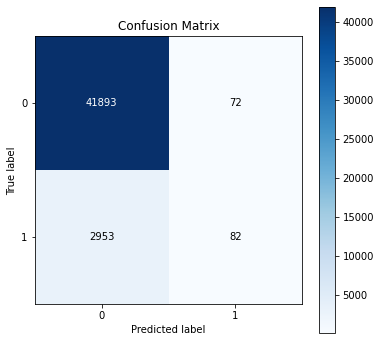

In [543]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

### calculating  ROC

In [544]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.00171572 1.        ]
(3,)
[0.         0.02701812 1.        ]
(3,)
[2 1 0]


### calculating  AUC

In [545]:
from sklearn import metrics
# AUC
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5126512032169273


### Plotting ROC

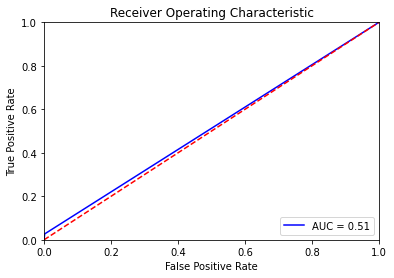

In [546]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Calculate F1 score

In [547]:
#calculate F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predi) 

0.051426779554719346

### Accuracy score

In [548]:
accuracy_score(y_test, y_predi) 


0.9327777777777778

In [549]:
form = []
form.append(['Logistic Regression',accuracy_score(y_test, y_predi)])

### Precision

In [550]:
precision_score(y_test, y_predi)

0.5324675324675324

### Recall

In [551]:

recall_score(y_test, y_predi)

0.02701812191103789

### Cost-sensitive accuracy

In [552]:
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9982876305087164


In [553]:
results = pd.DataFrame([['Logistic Regression', accuracy_score(y_test, y_predi) ,precision_score(y_test, y_predi),recall_score(y_test, y_predi), f1_score(y_test, y_predi) ,roc_auc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.932778,0.532468,0.027018,0.051427,0.512651


## Decision Tree

In [554]:
from sklearn.tree import DecisionTreeClassifier

#specify the model, set any numeric valye as parameter to ensure reproducibility 
dTree = DecisionTreeClassifier(random_state=1)

#fit the model
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

### Make predictions

In [555]:
predictions_train = dTree.predict(x_train)
y_pred = dTree.predict(x_test)

In [556]:
#this section investigates resulting data
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0 0 0 ... 1 0 1]
[0 0 0 ... 0 0 0]
(45000,)
int64
(45000,)
int64


In [557]:
#conver float to int
y_predi = y_pred.astype(int)

### create confusion matrics in text view

In [558]:
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(39595, 2370, 2222, 813)

### Plotting Cunfusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

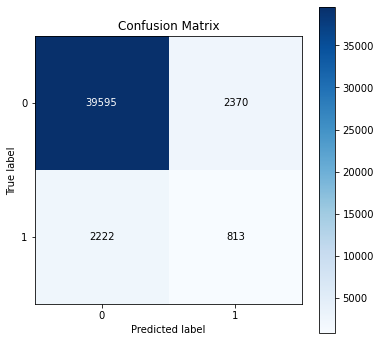

In [559]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

### ROC

In [560]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.05647563 1.        ]
(3,)
[0.         0.26787479 1.        ]
(3,)
[2 1 0]


### AUC

In [561]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6056995798059535

### Plotting 

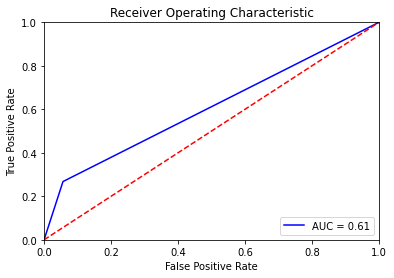

In [562]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### F1 score

In [563]:
f1_score=f1_score(y_test, y_predi)
f1_score

0.26149887423608875

### Accuracy score

In [564]:
a_score=accuracy_score(y_test, y_predi) 
a_score

0.8979555555555555

### Precision

In [565]:
p_score=precision_score(y_test, y_predi)
p_score

0.2554194156456173

### Recall

In [566]:
recall_score=recall_score(y_test, y_predi)
recall_score

0.26787479406919273

### cost-sensitive accuracy

In [567]:
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9445976904016083


In [568]:
dt = pd.DataFrame([['Decision Tree', a_score ,p_score,recall_score, f1_score ,roc_auc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
dt

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Decision Tree,0.897956,0.255419,0.267875,0.261499,0.6057


In [569]:
results = results.append(dt, ignore_index = True)


In [570]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.932778,0.532468,0.027018,0.051427,0.512651
1,Decision Tree,0.897956,0.255419,0.267875,0.261499,0.605700


## KNN

In [571]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model_KNN.fit(x_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
knn_scores_proba = knn.predict_proba(x_train)
knn_scores = knn_scores_proba[:,1]
print("AUC Score :", roc_auc_score(y_train,knn_scores))

AUC Score : 0.8886195756715168


In [572]:
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(100, 1000+1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)

100 0.7738365716625469
200 0.7751776319444048
300 0.7679608507207013
400 0.7659084657313275
500 0.760544731027327
600 0.7546051182920732
700 0.750963969150569
800 0.7484402963087424
900 0.7465734585834943
1000 0.7445061871006885

200 0.7751776319444048


In [573]:
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(320, 400+1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)

320 0.7670568377860976
330 0.7665339104466713
340 0.7661070700833106
350 0.766047414188218
360 0.7663753449518907
370 0.7666842632451809
380 0.7665274996756338
390 0.7664235965053643
400 0.7659084657313275

320 0.7670568377860976


Text(0, 0.5, 'score(AUC)')

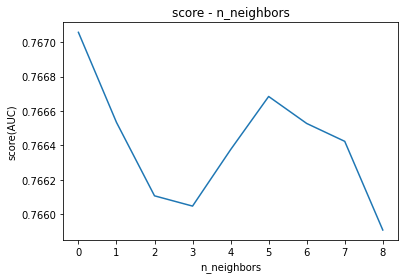

In [574]:
plt.plot(scorelist)
plt.title('score - n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score(AUC)')

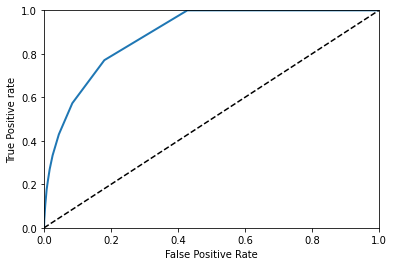

In [575]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, knn_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)

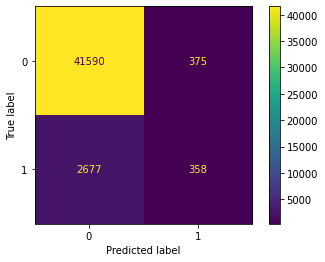

In [576]:
y_pred = model_KNN.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

In [577]:
roc=roc_auc_score(y_test, y_pred)
roc

0.554510574140881

In [578]:
acc=accuracy_score(y_test, y_pred.round(), normalize=True)
acc

0.9321777777777778

In [579]:
prec = precision_score(y_test, y_pred.round())
prec

0.48840381991814463

In [580]:
k_results = pd.DataFrame([['K-Nearest Neighbour ', acc ,prec ,roc_auc_score(y_train,knn_scores)]],
columns = ['Model', 'Accuracy', 'Precision','ROC_AUC'])
k_results

,Model,Accuracy,Precision,ROC_AUC
0,K-Nearest Neighbour,0.932178,0.488404,0.88862


### Gaussian Naive Bayes

In [581]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_scores_proba = gaussian.predict_proba(x_train)
gaussian_scores = gaussian_scores_proba[:,1]
y_pred = gaussian.predict_proba(x_test)[:,1]
y_predi=gaussian.predict(x_test)

gaussian_scores = roc_auc_score(y_test, y_pred)
print(gaussian_scores)

0.7097319979719509


In [582]:
print(y_test)

16269     0
140471    0
78683     0
2605      0
81156     0
         ..
148024    0
59238     0
111773    0
107702    0
89084     0
Name: SeriousDlqin2yrs, Length: 45000, dtype: int64


In [583]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_scores_proba = gaussian.predict_proba(x_train)
gaussian_scores = gaussian_scores_proba[:,1]
roc_auc=roc_auc_score(y_train,gaussian_scores)
roc_auc

0.714745677265423

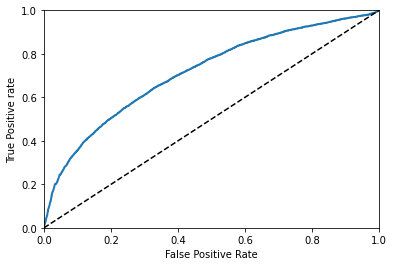

In [584]:
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gaussian_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

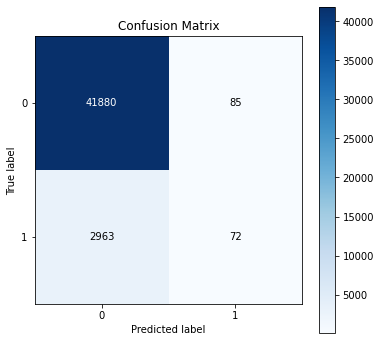

In [586]:
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

In [587]:
prec = precision_score(y_test, y_predi)
prec

0.4585987261146497

## Model Tuning using KFold

In [634]:
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kfold = KFold(n_splits=10, random_state=None)

### K-fold Cross-Validation  on Logistic Regression Model

In [635]:
# form = []
# logreg = LogisticRegression()
# lr_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(lr_scores), std(lr_scores)))

In [636]:
# evaluate a logistic regression model using k-fold cross-validation
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
lr_model = LogisticRegression()
# evaluate model
lr_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(lr_scores), std(lr_scores)))
LRscore=mean(lr_scores)

Accuracy: 0.670 (0.110)


### K-fold Cross-Validation  on Decision Tree

In [637]:

a, b = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
Dt_model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, a, b, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
DTCscore=mean(scores)

Accuracy: 0.640 (0.128)


### K-fold Cross-Validation  on KNN

In [638]:
knn_model = KNeighborsClassifier()
# evaluate model
knn_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(knn_scores), std(knn_scores)))
form.append(['KNN Tuned'.format(kcross_results),mean(knn_scores)])
KNNscore=mean(knn_scores)

Accuracy: 0.650 (0.112)


### K-fold Cross-Validation Gaussian Naive Bayes

In [639]:
gnb_model = GaussianNB()
# evaluate model
gnb_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(gnb_scores), std(gnb_scores)))
form.append(['Gaussian Naive Bayes Tuned'.format(gnb_scores),mean(gnb_scores)])
NBscore=mean(gnb_scores)

Accuracy: 0.630 (0.110)


In [640]:
form

[['KNN Tuned', 0.64],
 ['Gaussian Naive Bayes Tuned', 0.6799999999999999],
 ['KNN Tuned', 0.6599999999999999],
 ['Gaussian Naive Bayes Tuned', 0.6599999999999999],
 ['KNN Tuned', 0.65],
 ['Gaussian Naive Bayes Tuned', 0.65],
 ['KNN Tuned', 0.65],
 ['Gaussian Naive Bayes Tuned', 0.65],
 ['KNN Tuned', 0.6299999999999999],
 ['Gaussian Naive Bayes Tuned', 0.62],
 ['KNN Tuned', 0.66],
 ['Gaussian Naive Bayes Tuned', 0.67],
 ['KNN Tuned', 0.65],
 ['Gaussian Naive Bayes Tuned', 0.63]]

In [641]:

logreg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
log_pred                   = logreg.predict(x_test)
dt_pred                       = Dtree.predict(x_test)
knn_pred                       = knn_model.predict(x_test)

In [642]:
log_fpr, log_tpr, log_threshold   = roc_curve(y_test, log_pred)
dt_fpr, rfc_tpr, rfc_threshold   = roc_curve(y_test, dt_pred)
knn_fpr, knn_tpr, knn_threshold   = roc_curve(y_test, knn_pred)


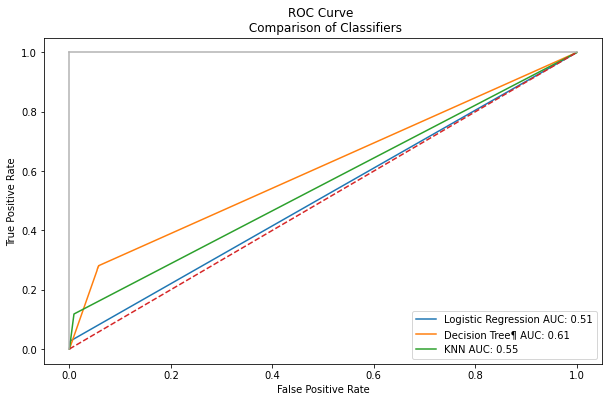

In [643]:
fig  = plt.figure(figsize=(10,6))
plt.title('ROC Curve \n Comparison of Classifiers')
plt.plot(log_fpr, log_tpr, label ='Logistic Regression AUC: {:.2f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(dt_fpr, rfc_tpr, label ='Decision Tree¶ AUC: {:.2f}'.format(roc_auc_score(y_test, dt_pred)))
plt.plot(knn_fpr, knn_tpr, label ='KNN AUC: {:.2f}'.format(roc_auc_score(y_test, knn_pred)))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [644]:
scores=[KNNscore,NBscore,LRscore,DTCscore,]
AlgorthmsName=["K-NN","Naive Bayes","Logistic Regression","Decision Tree"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Conclusion
I was comparison ML Classification Algorithms with the Give Me Some Credit.

I found the best result with Logistic Regression .
